# CONSTRUCTION OF FX VOL SURFACE - PART II

In this notebook I show how you can calibrate to the FX Vol Surface to ATM, 25D and 10D at one expiry date and analyse different volatility interpolation methods.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.utils import *
from financepy.models.black_scholes import *
from financepy.products.fx import *
from financepy.market.curves import DiscountCurveFlat
from financepy.market.volatility import *

####################################################################
# FINANCEPY BETA Version 0.260 - This build:  22 Nov 2022 at 12:35 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
#  Report bugs as issues at https://github.com/domokane/FinancePy  #
####################################################################



## Load the Volatility Market Quotes

In [3]:
valuation_date = Date(10, 4, 2020)

In [4]:
forName = "EUR"
domName = "USD"
forCCRate = 0.03460  # EUR
domCCRate = 0.02940  # USD

We need to set up the option details - what you would find in the Term Sheet.

In [5]:
dom_discount_curve = DiscountCurveFlat(valuation_date, domCCRate)
for_discount_curve = DiscountCurveFlat(valuation_date, forCCRate)

In [6]:
currency_pair = forName + domName
spot_fx_rate = 1.3465        

I now load the option tenor, the ATM vol and the market strangle and risk-reversal quotes.

In [7]:
tenors = ['1Y']
atm_vols = [18.250]
ms25DeltaVols = [0.95]
rr25DeltaVols = [-0.60]
ms10DeltaVols = [3.806]
rr10DeltaVols = [-1.359]

We need to set some parameters for the vol surface.

In [8]:
notional_currency = forName
atmMethod = FinFXATMMethod.FWD_DELTA_NEUTRAL
deltaMethod = FinFXDeltaMethod.SPOT_DELTA
alpha = 0.50

In [9]:
fxVolSurfaceClark = FXVolSurfacePlus(valuation_date, spot_fx_rate, currency_pair, notional_currency,
                                       dom_discount_curve, for_discount_curve,
                                       tenors, atm_vols, 
                                        ms25DeltaVols, rr25DeltaVols, 
                                        ms10DeltaVols, rr10DeltaVols,
                                        alpha,
                                        atmMethod, deltaMethod, 
                                        VolFunctionTypes.CLARK)

In [10]:
fxVolSurfaceSABR = FXVolSurfacePlus(valuation_date, spot_fx_rate, currency_pair, notional_currency,
                                       dom_discount_curve, for_discount_curve,
                                       tenors, atm_vols,
                                       ms25DeltaVols, rr25DeltaVols, 
                                       ms10DeltaVols, rr10DeltaVols,
                                       alpha,
                                       atmMethod, deltaMethod, 
                                       VolFunctionTypes.SABR)

In [11]:
fxVolSurfaceBBG = FXVolSurfacePlus(valuation_date, spot_fx_rate, currency_pair, notional_currency,
                                       dom_discount_curve, for_discount_curve,
                                       tenors, atm_vols, 
                                       ms25DeltaVols, rr25DeltaVols, 
                                       ms10DeltaVols, rr25DeltaVols,
                                       alpha,
                                       atmMethod, deltaMethod, 
                                       VolFunctionTypes.BBG)

We can examine the calibration

In [12]:
fxVolSurfaceClark.check_calibration(True)

VALUE DATE: 10-APR-2020
SPOT FX RATE: 1.3465
ALPHA WEIGHT: 0.5
ATM METHOD: FinFXATMMethod.FWD_DELTA_NEUTRAL
DELTA METHOD: FinFXDeltaMethod.SPOT_DELTA
TENOR: 1Y
EXPIRY DATE: 10-APR-2021
IN ATM VOL: 18.250000 %
IN MKT STRANGLE 25D VOL:  0.950000 %
IN RSK REVERSAL 25D VOL: -0.600000 %
IN MKT STRANGLE 10D VOL:  3.806000 %
IN RSK REVERSAL 10D VOL: -1.359000 %
T_(YEARS):  1.0
CNT_CPD_RD: 2.940000 %
CNT_CPD_RF: 3.460000 %
FWD_RATE:   1.339516
VOL FUNCTION VolFunctionTypes.CLARK
VOL_PARAMETERS: [-1.69968293  0.09712045  0.92893864]
OUT_K_ATM:   1.362010
OUT_ATM_VOL: 18.232135 %
FAILED FIT TO ATM VOL IN: 18.250000  OUT: 18.232135  DIFF: -0.017865
CALL_DELTA:  0.482927  PUT_DELTA: -0.483065  NET_DELTA: -0.000138
MKT STRANGLE 25D VOL IN:  0.950000 %
K_25D_C_MS:  1.544922  ATM + MSVOL: 19.200000 %   DELTA:  0.250000
K_25D_P_MS:  1.205034  ATM + MSVOL: 19.200000 %   DELTA: -0.250000
CALL_VALUE:  0.035509  PUT_VALUE:  0.043125  MS_VALUE:  0.078634
K_25D_C_MS:  1.544922  SURFACE_VOL: 19.147828 %   DE

In [13]:
fxVolSurfaceSABR.check_calibration(True)

VALUE DATE: 10-APR-2020
SPOT FX RATE: 1.3465
ALPHA WEIGHT: 0.5
ATM METHOD: FinFXATMMethod.FWD_DELTA_NEUTRAL
DELTA METHOD: FinFXDeltaMethod.SPOT_DELTA
TENOR: 1Y
EXPIRY DATE: 10-APR-2021
IN ATM VOL: 18.250000 %
IN MKT STRANGLE 25D VOL:  0.950000 %
IN RSK REVERSAL 25D VOL: -0.600000 %
IN MKT STRANGLE 10D VOL:  3.806000 %
IN RSK REVERSAL 10D VOL: -1.359000 %
T_(YEARS):  1.0
CNT_CPD_RD: 2.940000 %
CNT_CPD_RF: 3.460000 %
FWD_RATE:   1.339516
VOL FUNCTION VolFunctionTypes.SABR
VOL_PARAMETERS: [ 0.18788019  0.73225502 -0.05179102  0.81432418]
OUT_K_ATM:   1.362010
OUT_ATM_VOL: 18.249020 %
FAILED FIT TO ATM VOL IN: 18.250000  OUT: 18.249020  DIFF: -0.000980
CALL_DELTA:  0.482992  PUT_DELTA: -0.483000  NET_DELTA: -0.000008
MKT STRANGLE 25D VOL IN:  0.950000 %
K_25D_C_MS:  1.544922  ATM + MSVOL: 19.200000 %   DELTA:  0.250000
K_25D_P_MS:  1.205034  ATM + MSVOL: 19.200000 %   DELTA: -0.250000
CALL_VALUE:  0.035509  PUT_VALUE:  0.043125  MS_VALUE:  0.078634
K_25D_C_MS:  1.544922  SURFACE_VOL: 18.92

In [14]:
fxVolSurfaceBBG.check_calibration(True)

VALUE DATE: 10-APR-2020
SPOT FX RATE: 1.3465
ALPHA WEIGHT: 0.5
ATM METHOD: FinFXATMMethod.FWD_DELTA_NEUTRAL
DELTA METHOD: FinFXDeltaMethod.SPOT_DELTA
TENOR: 1Y
EXPIRY DATE: 10-APR-2021
IN ATM VOL: 18.250000 %
IN MKT STRANGLE 25D VOL:  0.950000 %
IN RSK REVERSAL 25D VOL: -0.600000 %
IN MKT STRANGLE 10D VOL:  3.806000 %
IN RSK REVERSAL 10D VOL: -0.600000 %
T_(YEARS):  1.0
CNT_CPD_RD: 2.940000 %
CNT_CPD_RF: 3.460000 %
FWD_RATE:   1.339516
VOL FUNCTION VolFunctionTypes.BBG
VOL_PARAMETERS: [ 0.18979308 -0.18096332  0.22507334]
OUT_K_ATM:   1.362010
OUT_ATM_VOL: 18.203833 %
FAILED FIT TO ATM VOL IN: 18.250000  OUT: 18.203833  DIFF: -0.046167
CALL_DELTA:  0.482818  PUT_DELTA: -0.483174  NET_DELTA: -0.000356
MKT STRANGLE 25D VOL IN:  0.950000 %
K_25D_C_MS:  1.544922  ATM + MSVOL: 19.200000 %   DELTA:  0.250000
K_25D_P_MS:  1.205034  ATM + MSVOL: 19.200000 %   DELTA: -0.250000
CALL_VALUE:  0.035509  PUT_VALUE:  0.043125  MS_VALUE:  0.078634
K_25D_C_MS:  1.544922  SURFACE_VOL: 19.219528 %   DELT

## Volatility Smile Analysis - Different Volatility Function Types

In [15]:
strikes = np.linspace(0.5, 2.5, 1000)

In [16]:
expiry_date = valuation_date.add_tenor("1Y")

In [17]:
volsClark = []
volsSABR = []
volsBBG = []

for k in strikes:
    volClark = fxVolSurfaceClark.volatility_from_strike_date(k, expiry_date)
    volSABR = fxVolSurfaceSABR.volatility_from_strike_date(k, expiry_date)
    volBBG = fxVolSurfaceBBG.volatility_from_strike_date(k, expiry_date)
    volsClark.append(volClark*100.0)    
    volsSABR.append(volSABR*100.0)    
    volsBBG.append(volBBG*100.0)    

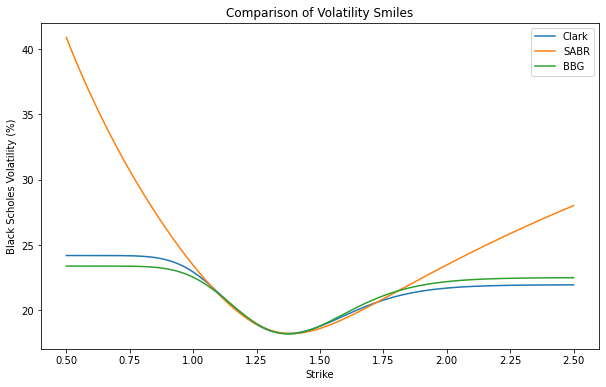

In [18]:
plt.figure(figsize=(10,6))
plt.plot(strikes, volsClark, label="Clark")
plt.plot(strikes, volsSABR, label="SABR")
plt.plot(strikes, volsBBG, label="BBG")
plt.xlabel("Strike")
plt.ylabel("Black Scholes Volatility (%)")
plt.title("Comparison of Volatility Smiles")
plt.legend();

## Implied FX Rate Probability Density Functions

In [19]:
lower = 0.50
upper = 2.25
dbnClark = fxVolSurfaceClark.implied_dbns(lower, upper, 1000)
dbnSABR = fxVolSurfaceSABR.implied_dbns(lower, upper, 1000)
dbnBBG = fxVolSurfaceBBG.implied_dbns(lower, upper, 1000)

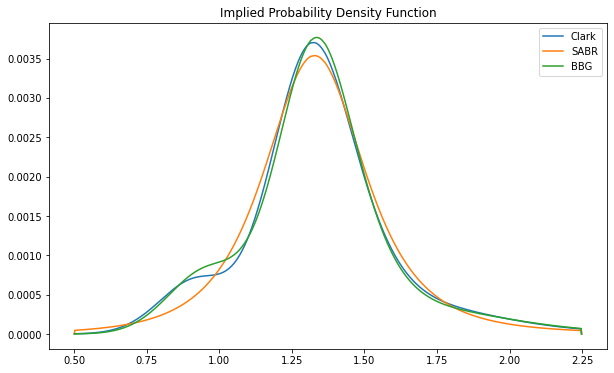

In [20]:
plt.figure(figsize=(10,6))
plt.plot(dbnClark[0]._x, dbnClark[0]._densitydx, label="Clark")
plt.plot(dbnSABR[0]._x, dbnSABR[0]._densitydx, label="SABR")
plt.plot(dbnBBG[0]._x, dbnBBG[0]._densitydx, label="BBG")
plt.title("Implied Probability Density Function")
plt.legend();

## Expiry Date Interpolation

We only have one expiry date. The volatility is therefore assumed to be flat at the level of this expiry date.

In [21]:
k = 1.30

In [22]:
years = np.linspace(0.0, 2.0, 100)

In [23]:
expiry_dates = valuation_date.add_years(years)

In [24]:
volsClark = []
volsSABR = []
volsBBG = []

for expiry_date in expiry_dates:
    
    volClark = fxVolSurfaceClark.volatility_from_strike_date(k, expiry_date)
    volSABR = fxVolSurfaceSABR.volatility_from_strike_date(k, expiry_date)
    volBBG = fxVolSurfaceBBG.volatility_from_strike_date(k, expiry_date)

    volsClark.append(volClark*100.0)    
    volsSABR.append(volSABR*100.0)    
    volsBBG.append(volBBG*100.0)    

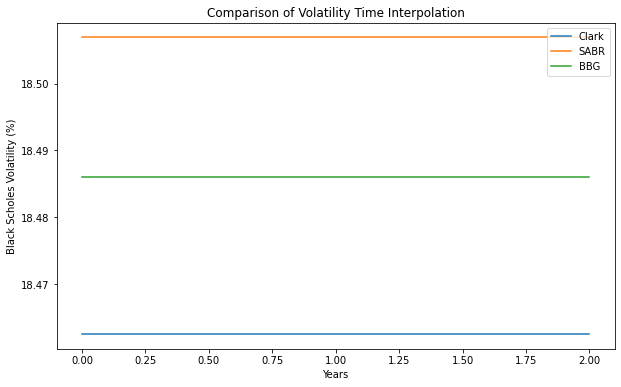

In [25]:
plt.figure(figsize=(10,6))
plt.plot(years, volsClark, label="Clark")
plt.plot(years, volsSABR, label="SABR")
plt.plot(years, volsBBG, label="BBG")
plt.xlabel("Years")
plt.ylabel("Black Scholes Volatility (%)")
plt.title("Comparison of Volatility Time Interpolation")
plt.legend();

Copyright (c) 2020, Dominic O'Kane 